# Proyek Analisis Data: Bike-sharing  
- **Nama:** Uswatun Awwalul 'Azmi
- **Email:** uswatunulul@gmail.com
- **ID Dicoding:** uswatun_awwalul_yVJp

## Menentukan Pertanyaan Bisnis

- Pada hari apakah persewaan sepeda paling ramai dan paling sepi dikunjungi pengguna untuk menyewa sepeda?
- Bagaimana pengaruh temperatur/suhu terhadap persewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Tahap gathering data yaitu akan dikumpulkan dan muat semua data yang diperlukan.

In [235]:
from google.colab import files
files.upload()

Saving day.csv to day (2).csv


{'day (2).csv': b'instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt\r\n1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985\r\n2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801\r\n3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349\r\n4,2011-01-04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562\r\n5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600\r\n6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606\r\n7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510\r\n8,2011-01-08,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959\r\n9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822\r\n10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321\r\n11,2011-01-11,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263\r\n12,2011

In [236]:
day_df = pd.read_csv("day.csv")
print(day_df)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0      

Data yang diperlukan sudah berhasil dimuat. Data yang digunakan memuat
instan: indeks
dteday : tanggal
musim : musim (1:musim semi, 2:musim panas, 3:musim gugur, 4:musim dingin)
yr : tahun (0: 2011, 1:2012)
mnth: bulan (1 hingga 12)
holiday : hari cuaca sedang libur atau tidak
weekday : hari dalam seminggu
workingday : jika hari bukan akhir pekan atau hari libur adalah 1, sebaliknya adalah 0.
weathersit :
1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
4: Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut
temp : Suhu normal dalam Celsius (hanya dalam skala per jam)
atemp: Menormalkan suhu perasaan dalam Celsius
hum: Kelembapan yang dinormalisasi. Nilainya dibagi menjadi 100 (maks)
windspeed: Kecepatan angin yang dinormalisasi. Nilainya dibagi menjadi 67 (maks)
casual: jumlah pengguna biasa
registered: jumlah pengguna terdaftar
cnt: jumlah total sepeda sewaan termasuk sepeda kasual dan terdaftar

### Assessing Data

pada tahap ini adlaah menilai data day_df apakah ada missing value atau kesalahan lainnya dalam data.

In [237]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Bedasarkan output tidak terdapat missing value, tetapi terdapat kesalahan tipe data untuk kolom "dteday" yang seharusnya dideteksi sebagai tipe data datetime bukan object. Kesalahan tersebut disimpan terlebih dahulu dan akan dibenarkan pada tahap cleaning data. Untuk memastikan kembali apakah ada missing value atau tidak kita cek menggunakan kode di bawah ini

In [238]:
print(day_df.isnull().values.any())

False


Output mengatakan 'False' maka dapat disimpulakn benar tidak ada missing value pada data/ data yang digunakan lengkap. Langkah selanjutnya yaitu memeriksa apakah data yang digunakan terdapat duplikasi atau tidak

In [239]:
print("Terdapat duplikasi sebanyak: ", day_df.duplicated().sum())

Terdapat duplikasi sebanyak:  0


Dari hasil diatas diketahui tidak terdapat data yang terduplikat

Langkah selanjutnya yaitu memeriksa parameter statistik dari kolom numerik dalam day_df.

In [240]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Hasil yang dimunculkan merupakan ringkasan parameter statistik mulai dari nilai mear, minimal, maksimal dll. Dari hasil assesing data, untuk data day_df terdapat ketidaktepatan perepresentasian tipe data.

### Cleaning Data

Pada tahap ini data yang mengalami kesalahan akan diperbaiki. Tahap ini akan melakukan  perubahan type data yang salah yaitu pada kolom "dteday"

In [241]:
dteday_columns = ["dteday"]

for column in dteday_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [242]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Pada type kolom "dteday" sudah diubah menjadi tipe data waktu (datetime64(ns)

## Exploratory Data Analysis (EDA)

### Explore  the day_df

Tahap selanjutnya adalah eksplorasi data "day_df" terlebih dahulu.

In [243]:
day_df.describe(include="all")

<ipython-input-243-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Dari hasil tangkuman parameter statistik, dapat diketahui jika mulai tanggal 01 Januari 2011 hingga tanggal 31 Desember 2012 terdapat minimal 22 pelanggan untuk keseluruhan baik pelanggan terdaftar maupun pelanggan pelanggan biasa. Pada kurun waktu tersebut terdapat maksimal 8714 pelanggan

Langkah selanjutnya yaitu melihat banyaknya penyewa sepedah tergantung dengan jenis cuacanya

In [244]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean"]
})

instant   cnt                  
           nunique   max  min         mean
weathersit                                
1              463  8714  431  4876.786177
2              247  8362  605  4035.862348
3               21  4639   22  1803.285714

Output diatas merupakan pivot table, dan menjelaskan bahwa jumlah total sepeda sewaan termasuk casual (jumlah pengguna biasa) dan  registered (jumlah pengguna terdaftar) lebih banyak memilih menyewa sepeda pada cuaca 1 atau cuaca cerah, sedikit awan dan berawan sebagian.

jumlah total sepeda sewaan termasuk casual dan registered lebih sedikit pada kondisi cuaca ke-3 yaitu salju ringan, hujan ringan dengan badai petir, dan hujan ringan


In [245]:
day_df.groupby(by="season").agg({
    "cnt": "nunique",
    "temp": ["max", "min", "mean"]
})

cnt      temp                    
       nunique       max       min      mean
season                                      
1          179  0.572500  0.059130  0.297748
2          182  0.808333  0.253043  0.544405
3          188  0.861667  0.469167  0.706309
4          176  0.657500  0.220833  0.422906

Dari hasil, diketahui jika terdapat jumlah total sepeda sewaan termasuk sepeda kasual dan terdaftar merata mulai dari musim ke-1 hingga musim ke-4.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada hari apakah persewaan sepeda paling ramai dan paling sepi dikunjungi pengguna untuk menyewa sepeda?

In [246]:
day_df.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431


Hasil output, difokuskan pada kolom "weekday" sebagai acuan hari dan kolom "cnt" sebagai acuan banyaknya penyewa sepeda. Hasil dapat disimpukan jika hari paling ramai yaitu pada hari "6" atau hari Sabtu (sesuai urutan hari dimulai dari hari Minggu dinotasikan sebagai 0 ). Sedangkan hari yang paling sepi adalah hari "1" atau hari Senin



Untuk memastikan hasil pengurutan diatas, digunakan pivot table untuk menginformasikan jumlah pengunjung bedasarkan kolom "weekday"

In [247]:
pivot_tab = day_df.pivot_table(index='weekday', aggfunc={'cnt':
              ['mean', 'std', 'min', 'max'], 'instant': 'nunique'})

print(pivot_tab)

          cnt                                 instant
          max         mean   min          std nunique
weekday                                              
0        8227  4228.828571   605  1872.496629     105
1        7525  4338.123810    22  1793.074013     105
2        7767  4510.663462   683  1826.911642     104
3        8173  4548.538462   441  2038.095884     104
4        7804  4667.259615   431  1939.433317     104
5        8362  4690.288462  1167  1874.624870     104
6        8714  4550.542857   627  2196.693009     105


Pada pivot table diatas terbukti jika hari yang paling ramai yaitu hari "6" atau hari Sabtu dengan jumlah penyewa sepeda sebanyak 8714 sedangkan hari "1" merupakan hari paling sepi dengan penyewa yaitu 7525.

In [248]:
sort_sewa_df = day_df.groupby("weekday").cnt.max().sort_values(ascending=False).reset_index()
sort_sewa_df

,weekday,cnt
0,6,8714
1,5,8362
2,0,8227
3,3,8173
4,4,7804
5,2,7767
6,1,7525


<ipython-input-249-ac9d6eaa351e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekday", y="cnt", data=sort_sewa_df, color="cyan", ax=ax, palette=colors)


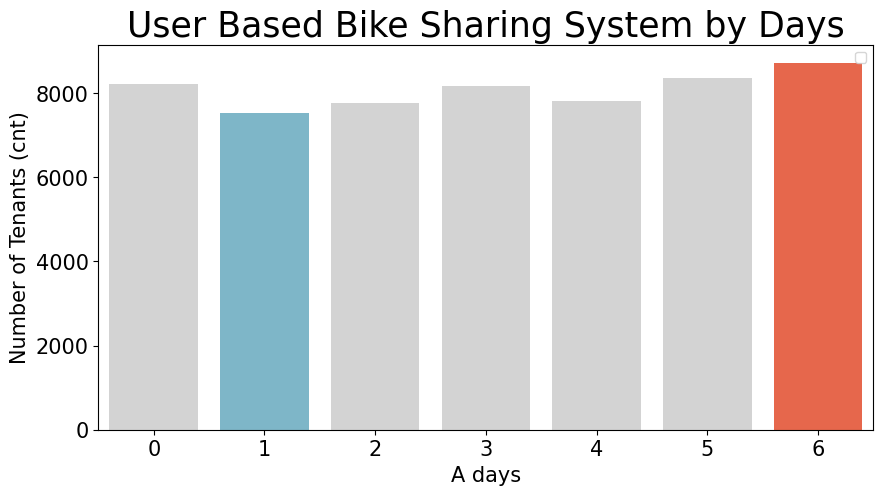

In [249]:
fig, ax = plt.subplots(figsize=(10, 5))
colors=["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#FF5733"]
sns.barplot(x="weekday", y="cnt", data=sort_sewa_df, color="cyan", ax=ax, palette=colors)
ax.set_xlabel("A days", fontsize=15)
ax.set_ylabel("Number of Tenants (cnt)", fontsize=15)
ax.set_title("User Based Bike Sharing System by Days", fontsize=25)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.legend(loc='upper right')

plt.show()

Dari kedua visualisasi diketahui jika hari dengan pengunjung terbanyak yaitu pada hari ke"6" merupakan hari dengan pengunjung terbanyak dalam seminggu, sedangkan hari ke"1" merupakan hari dengan pengunjung tersedikit.

### Pertanyaan 2:Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

Untuk menjawab pertanyaan diatas perlu dilakukan pengurutan dahullu terhadap data day_df

In [250]:
day_df.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431


Selanjutnya dilakukan visualisasi data berupa scatter plot dengan garis regresi untuk menemukan hubungan antara variabel "temp" dengan variabel "cnt" (jumlah penyewa sepeda)

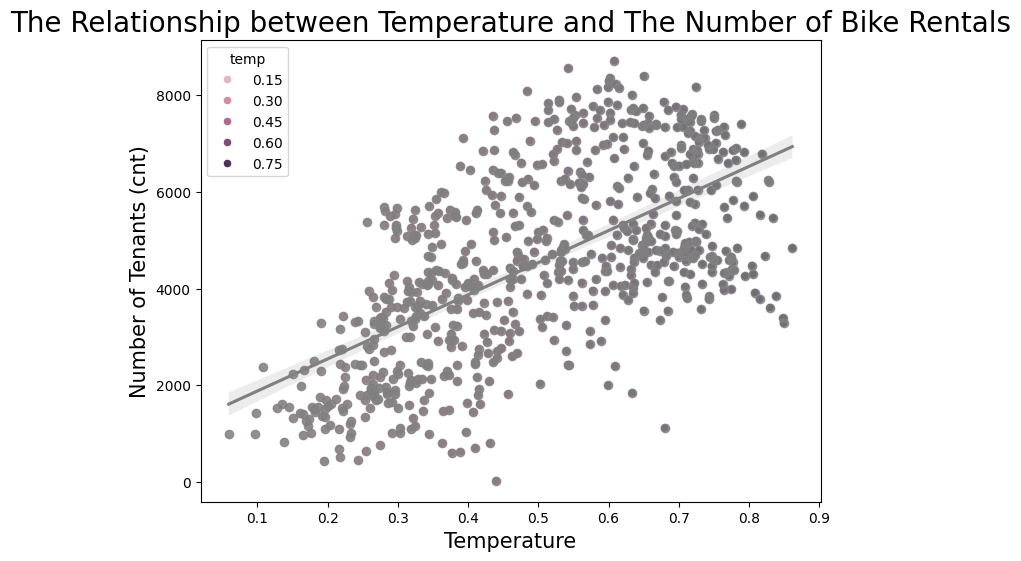

In [251]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="temp", y="cnt", data=day_df, color="blue", ax=ax, hue="temp")
sns.regplot(x='temp', y='cnt', data=day_df, color="grey")
ax.set_title('The Relationship between Temperature and The Number of Bike Rentals', fontsize=20)
ax.set_xlabel("Temperature", fontsize=15)
ax.set_ylabel("Number of Tenants (cnt)", fontsize=15)

plt.show()

Bedasarkan scatter plot yang telah dibuat dapat diketahui jika temperatur berbanding lurus dengan jumlah penyewa yang akan menyewa sepeda. Jika temperatur/suhu naik maka jumlah penyewa sepeda juga semakin naik. Scatter plot diatas juga menghasilkan garis korelasi regression dan pita di sekitasnya. Semakin kecil bentuk pita yang dihasilkan menandakan tingkat *confidence level* yang tinggi.

## Conclusion

- Kesimpulan dari pertanyaan 1 "Pada hari apakah persewaan sepeda paling ramai dan paling sepi dikunjungi pengguna untuk menyewa sepeda?" yaitu bedasarkan jumlah penyewa sepeda pada data yaitu di kolom "cnt", hari yang paling ramai dikunjungi penyewa sepeda adalah hari ke-6 atau hari Sabtu.

Note : 0 = Hari Minggu, 1 = Hari Seni, 2 = Hari Selasa, 3 = Hari Rabu, 4 = Hari Kamis, 5 = Hari Jumat, 6 = Hari Sabtu

- Kesimpulan dari pertanyaan 2 "Bagaimana pengaruh temperatur/suhu terhadap jumlah persewaan sepeda?" yaitu temperatur/suhu berpengaruh terhadap jumlah persewaan sepeda, keduanya berbanding lurus sehingga apabila temperatur/ suhu naik maka otomatis jumlah persewaan sepeda juga naik.


In [254]:
day_df.to_csv("all_data.csv", index=False)